Ocena 3.0

Wczytaj dane dotyczące wartości oraz klasyfikacji kąta χ, opisującego obrót wokół wiązania glikozydowego. Przedstaw histogram wszystkich danych oraz osobne histogramy dla wartości kątów z klasy anti
oraz syn. Wyznacz średnią kątową ¯θ oraz medianę kątową ˜θ wraz z przedziałami ufności 95%.

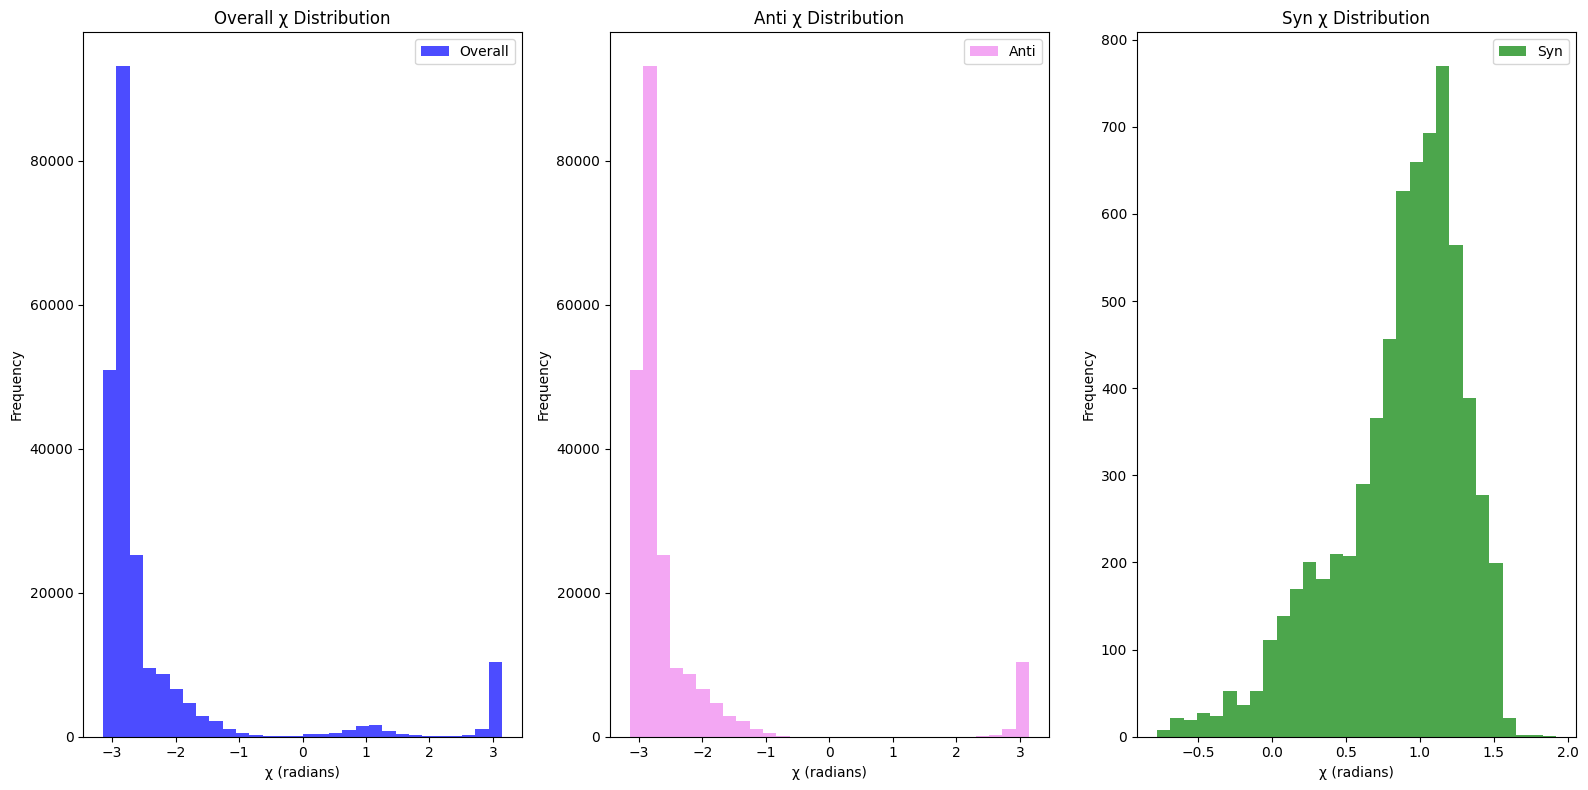

Overall:
  Circular Mean (¯θ): -2.773
  95% Confidence Interval: (-2.774, -2.773)
  Median (˜θ): -2.805
  95% CI for Median: [-2.806, -2.804]

Anti:
  Circular Mean (¯θ): -2.757
  95% Confidence Interval: (-2.758, -2.756)
  Median (˜θ): -2.813
  95% CI for Median: [-2.814, -2.812]

Syn:
  Circular Mean (¯θ): 0.878
  95% Confidence Interval: (0.873, 0.883)
  Median (˜θ): 0.958
  95% CI for Median: [0.948, 0.971]


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

file = 'chi.csv'
data = pd.read_csv(file)
data.head()

anti_data = data[data['glyco_bond'] == 'anti']['chi']
syn_data = data[data['glyco_bond'] == 'syn']['chi']

chi = sorted(data['chi'])

def calculate_circ_mean(data):
    mean = stats.circmean(data, high=np.pi, low=-np.pi)
    sinus = sum(np.sin(data))
    cosinus = sum(np.cos(data))
    R = np.sqrt(cosinus**2 + sinus**2) / len(data)
    m2 = sum(np.cos(2 * (np.array(data) - mean))) / len(data)
    delta = (1 - m2) / (2 * (R**2))
    sig = np.sqrt(delta) / np.sqrt(len(data))
    high = mean + np.arcsin(0.98 * sig)
    low = mean - np.arcsin(0.98 * sig)
    return mean, (low, high)

def calculate_median(data):
    median = np.median(data)
    m = 1 + int(0.98 * np.sqrt(len(data)))
    m_min = int(len(data) / 2) - m
    m_max = int(len(data) / 2) + m - 1
    high = data[m_max]
    low = data[m_min]
    return median, (low, high)

overall_mean, overall_ci = calculate_circ_mean(data['chi'])
overall_median, overall_median_ci = calculate_median(chi)
anti_mean, anti_ci = calculate_circ_mean(anti_data)
anti_median, anti_median_ci = calculate_median(sorted(anti_data))
syn_mean, syn_ci = calculate_circ_mean(syn_data)
syn_median, syn_median_ci = calculate_median(sorted(syn_data))

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.hist(data['chi'], bins=30, color='blue', alpha=0.7, label='Overall')
plt.title('Overall χ Distribution')
plt.xlabel('χ (radians)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(anti_data, bins=30, color='violet', alpha=0.7, label='Anti')
plt.title('Anti χ Distribution')
plt.xlabel('χ (radians)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(syn_data, bins=30, color='green', alpha=0.7, label='Syn')
plt.title('Syn χ Distribution')
plt.xlabel('χ (radians)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

print("Overall:")
print(f"  Circular Mean (¯θ): {overall_mean:.3f}")
print(f"  95% Confidence Interval: ({overall_ci[0]:.3f}, {overall_ci[1]:.3f})")
print(f"  Median (˜θ): {overall_median:.3f}")
print(f"  95% CI for Median: [{overall_median_ci[0]:.3f}, {overall_median_ci[1]:.3f}]")

print("\nAnti:")
print(f"  Circular Mean (¯θ): {anti_mean:.3f}")
print(f"  95% Confidence Interval: ({anti_ci[0]:.3f}, {anti_ci[1]:.3f})")
print(f"  Median (˜θ): {anti_median:.3f}")
print(f"  95% CI for Median: [{anti_median_ci[0]:.3f}, {anti_median_ci[1]:.3f}]")

print("\nSyn:")
print(f"  Circular Mean (¯θ): {syn_mean:.3f}")
print(f"  95% Confidence Interval: ({syn_ci[0]:.3f}, {syn_ci[1]:.3f})")
print(f"  Median (˜θ): {syn_median:.3f}")
print(f"  95% CI for Median: [{syn_median_ci[0]:.3f}, {syn_median_ci[1]:.3f}]")


Ocena 3.5

Sprawdź wizualnie oraz przy pomocy testu Wilcoxona symetryczność rozkładu wartości kątowych osobno dla klas anti oraz syn. Licząc odległość kątową od mediany skorzystaj z funkcji:

d(α, β) = ((α − β + π) mod 2π) − π


**Rozkład danych jest niesymetryczny, gdyż wartość p-value jest mniejsza niż 0,05, dodatkowo punkty na wykresach nie są rozłożone wokół osi y = 0 (hipoteza zerowa odrzucona).**

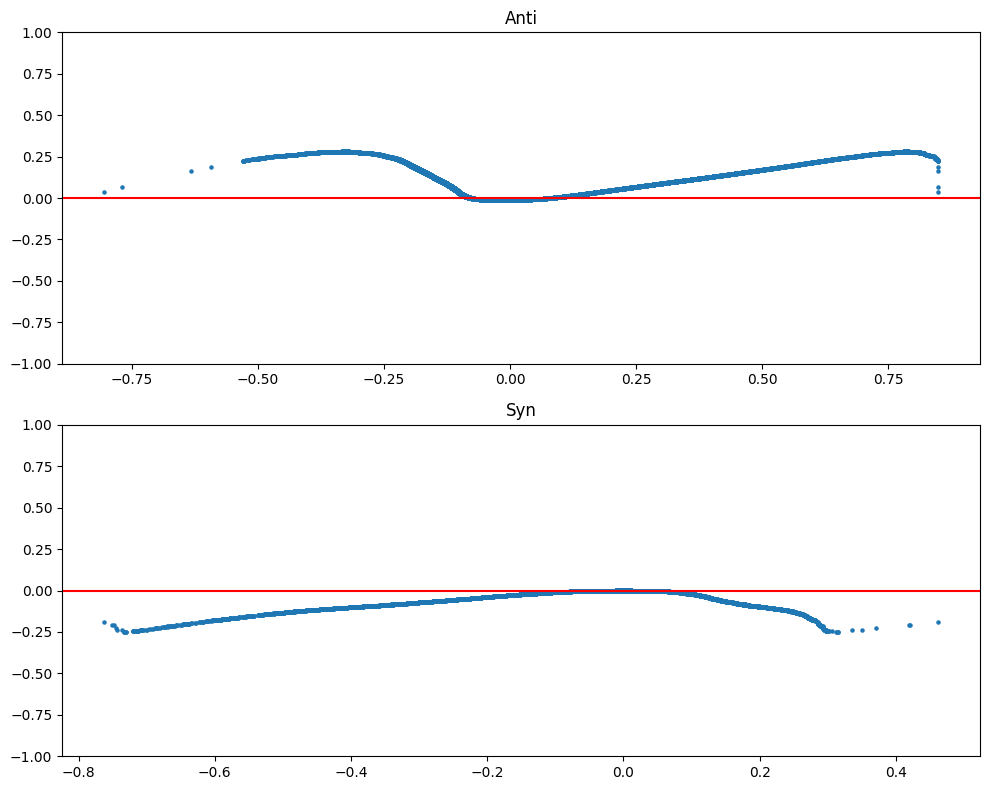

Wilcoxon Test Results:
  Anti Group:
    Wilcoxon Statistic: 11557342948.000
    p-value: 1.498e-17
  Syn Group:
    Wilcoxon Statistic: 10023400.500
    p-value: 1.473e-19


In [76]:
from scipy.stats import wilcoxon

def angular(angle1, angle2):
    return ((angle1 - angle2 + math.pi) % (2 * math.pi)) - math.pi

anti_med = np.median(anti_data)
anti_distances = [(angular(val, anti_med)) / 2 for val in anti_data]
anti_distances.sort()

syn_med = np.median(syn_data)
syn_distances = [(angular(val, syn_med)) / 2 for val in syn_data]
syn_distances.sort()

anti_wilcoxon_stat, anti_wilcoxon_p = wilcoxon(anti_distances)
syn_wilcoxon_stat, syn_wilcoxon_p = wilcoxon(syn_distances)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].scatter(
    [math.sin(d) for d in anti_distances],
    [math.sin((d + anti_distances[len(anti_distances) - idx - 1]) / 2) for idx, d in enumerate(anti_distances)],
    s=5
)
axs[0].set_title("Anti")
axs[0].axhline(y=0, color='red')
axs[0].set_ylim(-1, 1)

axs[1].scatter(
    [math.sin(d) for d in syn_distances],
    [math.sin((d + syn_distances[len(syn_distances) - idx - 1]) / 2) for idx, d in enumerate(syn_distances)],
    s=5
)
axs[1].set_title("Syn")
axs[1].axhline(y=0, color='red')
axs[1].set_ylim(-1, 1)

plt.tight_layout()
plt.show()

print("Wilcoxon Test Results:")
print(f"  Anti Group:")
print(f"    Wilcoxon Statistic: {anti_wilcoxon_stat:.3f}")
print(f"    p-value: {anti_wilcoxon_p:.3e}")
print(f"  Syn Group:")
print(f"    Wilcoxon Statistic: {syn_wilcoxon_stat:.3f}")
print(f"    p-value: {syn_wilcoxon_p:.3e}")


Ocena 4.0

Przesuń oba zbiory danych do średniej przy pomocy funkcji d. Sprawdź wizualnie (Q-Q plot) oraz przy pomocy testów Kuipera oraz Rayleigha hipotezę o jednostajności rozkładu osobno dla klas anti oraz syn. Dystrybuanta jednostajnego rozkładu kątowego na przedziale [−π; π] ma postać:

F(θ) = θ + π
2π

**Oba testy wskazują, że rozkłady nie są jednostajne, punkty na wykresach nie są rozłożone wokół przekątnej.**

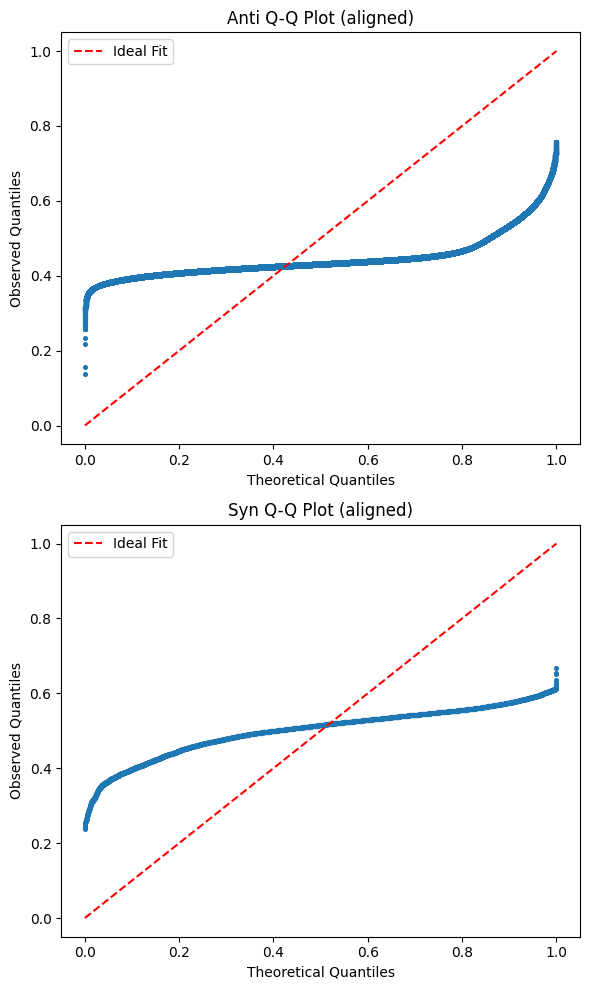

Kuiper Test Statistic:
Anti: 525.168
Syn: 86.908

Rayleigh Test Analysis:
Anti: 188497.565, p-value: 0.000e+00
Syn: 5631.566, p-value: 0.000e+00


In [75]:
from scipy.stats import wilcoxon, uniform
import matplotlib.pyplot as plt
import math
import numpy as np

def to_mean(data, center):
    return [angular(value, center) for value in data]

anti_center = np.mean(anti_data)
aligned_anti = to_mean(anti_data, anti_center)
aligned_anti_sorted = sorted(aligned_anti)
anti_cdf = [(value + math.pi) / (2 * math.pi) for value in aligned_anti_sorted]

syn_center = np.mean(syn_data)
aligned_syn = to_mean(syn_data, syn_center)
aligned_syn_sorted = sorted(aligned_syn)
syn_cdf = [(value + math.pi) / (2 * math.pi) for value in aligned_syn_sorted]

fig, axes = plt.subplots(2, 1, figsize=(6, 10))

axes[0].scatter([index / (len(anti_cdf) + 1) for index in range(len(anti_cdf))], 
                 anti_cdf, s=7)
axes[0].plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Fit')
axes[0].set_title("Anti Q-Q Plot (aligned)")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Observed Quantiles")
axes[0].legend()

axes[1].scatter([index / (len(syn_cdf) + 1) for index in range(len(syn_cdf))], 
                 syn_cdf, s=7)
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Fit')
axes[1].set_title("Syn Q-Q Plot (aligned)")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Observed Quantiles")
axes[1].legend()

plt.tight_layout()
plt.show()

print("Kuiper Test Statistic:")
anti_max_dev_plus = max([(idx / len(aligned_anti_sorted)) - value for idx, value in enumerate(anti_cdf)])
anti_max_dev_minus = max([value - ((len(aligned_anti_sorted) - idx) / len(aligned_anti_sorted)) for idx, value in enumerate(anti_cdf)])
anti_kuiper_statistic = (anti_max_dev_plus + anti_max_dev_minus) * (math.sqrt(len(aligned_anti_sorted)) + 0.155 + (0.24 / math.sqrt(len(aligned_anti_sorted))))
print(f"Anti: {anti_kuiper_statistic:.3f}")
syn_max_dev_plus = max([(idx / len(aligned_syn_sorted)) - value for idx, value in enumerate(syn_cdf)])
syn_max_dev_minus = max([value - ((len(aligned_syn_sorted) - idx) / len(aligned_syn_sorted)) for idx, value in enumerate(syn_cdf)])
syn_kuiper_statistic = (syn_max_dev_plus + syn_max_dev_minus) * (math.sqrt(len(aligned_syn_sorted)) + 0.155 + (0.24 / math.sqrt(len(aligned_syn_sorted))))
print(f"Syn: {syn_kuiper_statistic:.3f}")

print("\nRayleigh Test Analysis:")
anti_cos_sum = sum([math.cos(value) for value in aligned_anti_sorted])
anti_sin_sum = sum([math.sin(value) for value in aligned_anti_sorted])
anti_rayleigh_stat = (anti_cos_sum**2 + anti_sin_sum**2) / len(aligned_anti_sorted)
anti_rayleigh_p_value = math.exp(-anti_rayleigh_stat)
print(f"Anti: {anti_rayleigh_stat:.3f}, p-value: {anti_rayleigh_p_value:.3e}")

syn_cos_sum = sum([math.cos(value) for value in aligned_syn_sorted])
syn_sin_sum = sum([math.sin(value) for value in aligned_syn_sorted])
syn_rayleigh_stat = (syn_cos_sum**2 + syn_sin_sum**2) / len(aligned_syn_sorted)
syn_rayleigh_p_value = math.exp(-syn_rayleigh_stat)
print(f"Syn: {syn_rayleigh_stat:.3f}, p-value: {syn_rayleigh_p_value:.3e}")

Ocena 4.5

Dopasuj i podaj wartości parametrów rozkładu von Misesa (scipy.stats.vonmises.fit) osobno dla danych przesuniętych do średniej dla klas anti oraz syn. Przygotuj histogramy przesuniętych danych oraz nałóż na nie wynikowe funkcje gęstości prawdopodobieństwa. Przedstaw wykresy Q-Q plot (dystrybuanta to scipy.stats.vonmises.cdf). Wykonaj testy zgodności dopasowania Watsona U2 oraz testy Kuipera.

Fitted von Mises Parameters:
Anti Kappa: 7.562, Loc: -0.354
Syn Kappa: 5.950, Loc: 0.013


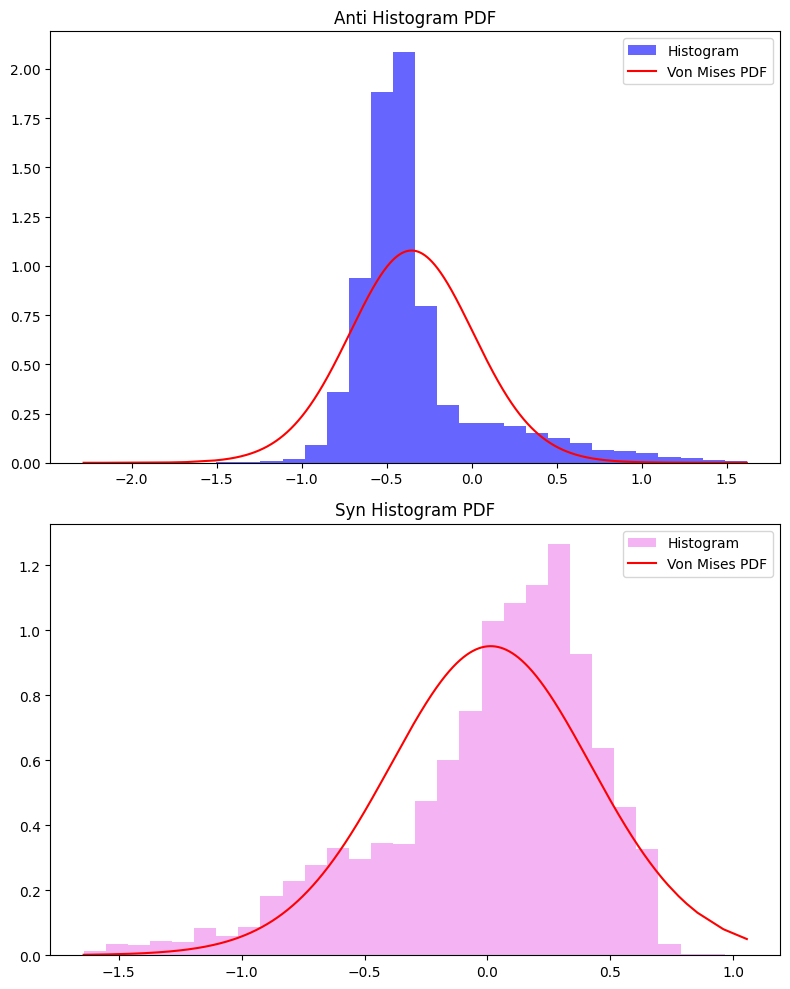

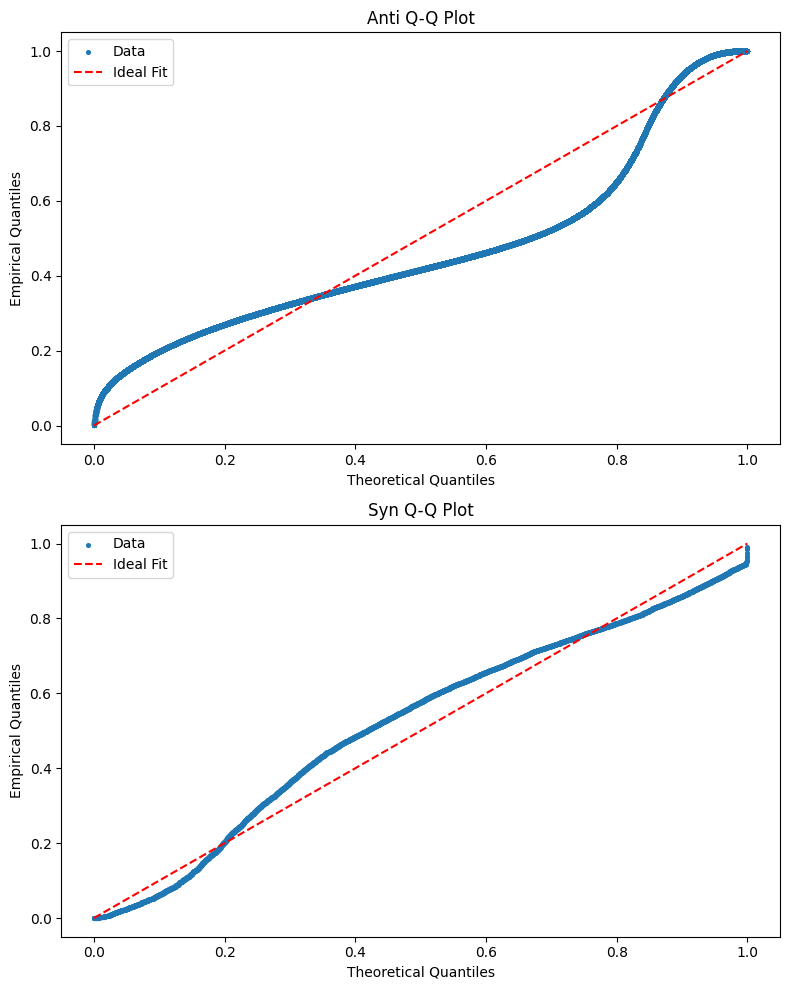

Anti Watson U^2 Statistic: 1930.421
Anti Kuiper Statistic: 550.810
Syn Watson U^2 Statistic: 14.971
Syn Kuiper Statistic: 86.039


In [79]:
from scipy.stats import vonmises
import matplotlib.pyplot as plt
import math
import numpy as np


def to_mean(data, center):
    return [angular(value, center) for value in data]

anti_center = np.mean(anti_data)
aligned_anti = to_mean(anti_data, anti_center)
aligned_anti_sorted = sorted(aligned_anti)
anti_kappa, anti_loc, _ = vonmises.fit(aligned_anti)
anti_pdf = vonmises.pdf(aligned_anti_sorted, anti_kappa, loc=anti_loc)

syn_center = np.mean(syn_data)
aligned_syn = to_mean(syn_data, syn_center)
aligned_syn_sorted = sorted(aligned_syn)
syn_kappa, syn_loc, _ = vonmises.fit(aligned_syn)
syn_pdf = vonmises.pdf(aligned_syn_sorted, syn_kappa, loc=syn_loc)

print("Fitted von Mises Parameters:")
print(f"Anti Kappa: {anti_kappa:.3f}, Loc: {anti_loc:.3f}")
print(f"Syn Kappa: {syn_kappa:.3f}, Loc: {syn_loc:.3f}")

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

axes[0].hist(aligned_anti, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
axes[0].plot(aligned_anti_sorted, anti_pdf, color='red', label='Von Mises PDF')
axes[0].set_title("Anti Histogram PDF")
axes[0].legend()

axes[1].hist(aligned_syn, bins=30, density=True, alpha=0.6, color='violet', label='Histogram')
axes[1].plot(aligned_syn_sorted, syn_pdf, color='red', label='Von Mises PDF')
axes[1].set_title("Syn Histogram PDF")
axes[1].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

anti_cdf = vonmises.cdf(aligned_anti_sorted, anti_kappa, loc=anti_loc)
anti_th_q = [(i - 0.5) / len(aligned_anti_sorted) for i in range(1, len(aligned_anti_sorted) + 1)]
axes[0].scatter(anti_th_q, anti_cdf, s=7, label='Data')
axes[0].plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Fit')
axes[0].set_title("Anti Q-Q Plot")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Empirical Quantiles")
axes[0].legend()

syn_cdf = vonmises.cdf(aligned_syn_sorted, syn_kappa, loc=syn_loc)
syn_th_q = [(i - 0.5) / len(aligned_syn_sorted) for i in range(1, len(aligned_syn_sorted) + 1)]
axes[1].scatter(syn_th_q, syn_cdf, s=7, label='Data')
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Fit')
axes[1].set_title("Syn Q-Q Plot")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Empirical Quantiles")
axes[1].legend()

plt.tight_layout()
plt.show()

anti_watson_z = vonmises.cdf([x - anti_loc for x in aligned_anti_sorted], anti_kappa, loc=0)
anti_watson_z.sort()
anti_watson_rp1 = sum([(x - ((2*i - 1) / (2 * len(anti_watson_z))))**2 for i, x in enumerate(anti_watson_z, start=1)])
anti_watson_rp2 = len(anti_watson_z) * (sum([x / len(anti_watson_z) for x in anti_watson_z]) - 0.5)**2
anti_watson_result = anti_watson_rp1 - anti_watson_rp2 + (1 / (12 * len(anti_watson_z)))
print(f"Anti Watson U^2 Statistic: {anti_watson_result:.3f}")

anti_d_plus = max([(i / len(aligned_anti_sorted)) - x for i, x in enumerate(anti_cdf, start=1)])
anti_d_minus = max([x - ((len(aligned_anti_sorted) - i + 1) / len(aligned_anti_sorted)) for i, x in enumerate(anti_cdf, start=1)])
anti_kuiper_stat = (anti_d_plus + anti_d_minus) * (math.sqrt(len(aligned_anti_sorted)) + 0.155 + (0.24 / math.sqrt(len(aligned_anti_sorted))))
print(f"Anti Kuiper Statistic: {anti_kuiper_stat:.3f}")

syn_watson_z = vonmises.cdf([x - syn_loc for x in aligned_syn_sorted], syn_kappa, loc=0)
syn_watson_z.sort()
syn_watson_rp1 = sum([(x - ((2*i - 1) / (2 * len(syn_watson_z))))**2 for i, x in enumerate(syn_watson_z, start=1)])
syn_watson_rp2 = len(syn_watson_z) * (sum([x / len(syn_watson_z) for x in syn_watson_z]) - 0.5)**2
syn_watson_result = syn_watson_rp1 - syn_watson_rp2 + (1 / (12 * len(syn_watson_z)))
print(f"Syn Watson U^2 Statistic: {syn_watson_result:.3f}")

syn_d_plus = max([(i / len(aligned_syn_sorted)) - x for i, x in enumerate(syn_cdf, start=1)])
syn_d_minus = max([x - ((len(aligned_syn_sorted) - i + 1) / len(aligned_syn_sorted)) for i, x in enumerate(syn_cdf, start=1)])
syn_kuiper_stat = (syn_d_plus + syn_d_minus) * (math.sqrt(len(aligned_syn_sorted)) + 0.155 + (0.24 / math.sqrt(len(aligned_syn_sorted))))
print(f"Syn Kuiper Statistic: {syn_kuiper_stat:.3f}")


Ocena 5.0

Potraktuj dane przesunięte do średniej, osobno dla klas anti i syn, jako pochodzące z mieszanego, trimodalnego rozkładu von Misesa. Dopasuj parametry rozkładu przy pomocy algorytmu EM i pokaż histogram oraz przebieg funkcji gęstości prawdopodobieństwa. Ponownie przygotuj wykresy Q-Q plot oraz wykonaj testy zgodności dopasowania Watsona U2 oraz testy Kuipera.

Anti:
  Component 1: Weight = 0.001, Kappa = 1.462, Mean = 1.066
  Component 2: Weight = 0.998, Kappa = 8.172, Mean = -0.355
  Component 3: Weight = 0.001, Kappa = 1.462, Mean = 1.066
Syn:
  Component 1: Weight = 0.002, Kappa = 10.473, Mean = -1.379
  Component 2: Weight = 0.995, Kappa = 6.543, Mean = 0.018
  Component 3: Weight = 0.002, Kappa = 10.473, Mean = -1.379


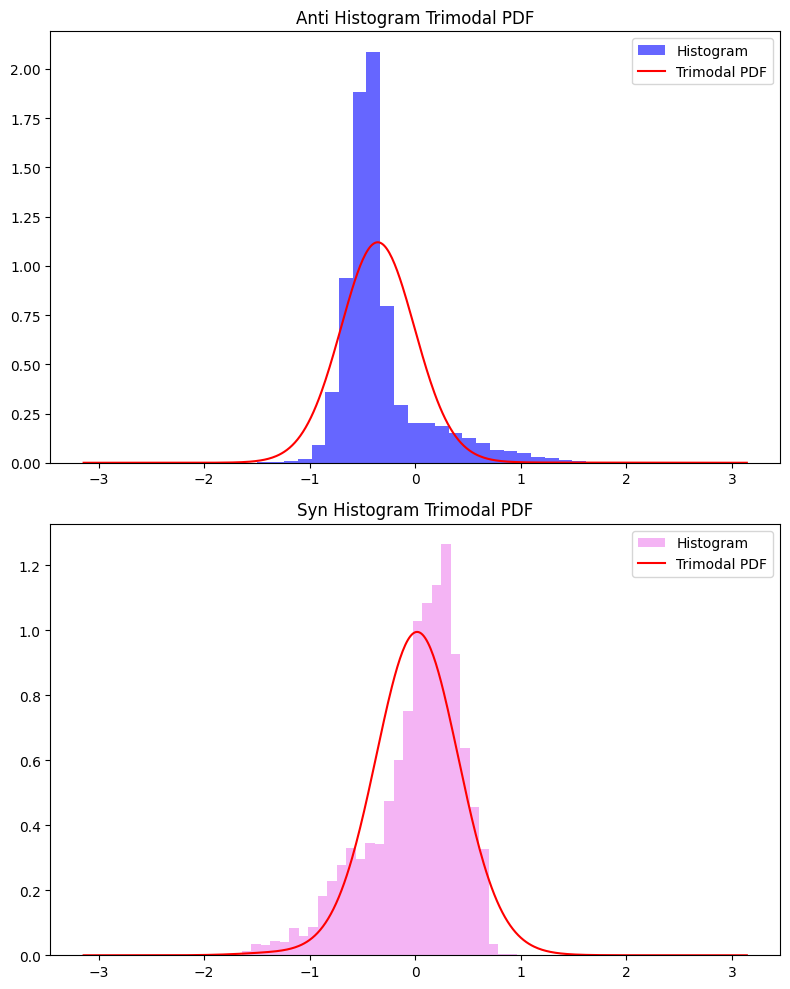

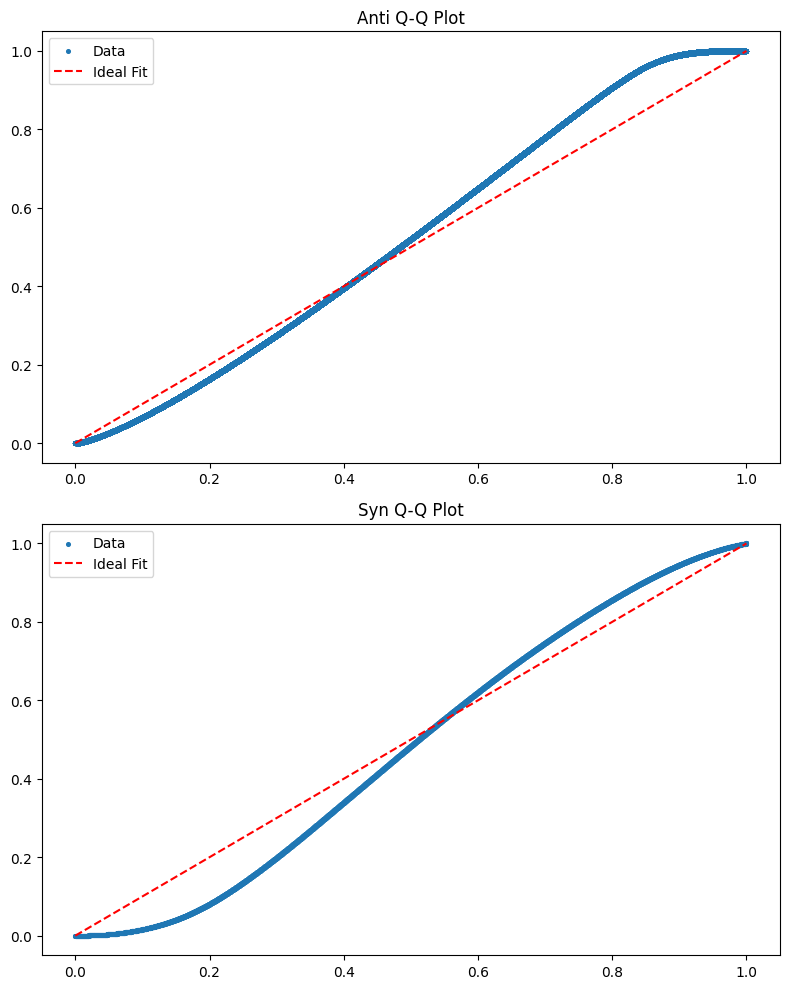

Anti Watson U^2 Statistic: 12431.625
Anti Kuiper Statistic: 483.833
Syn Watson U^2 Statistic: 510.580
Syn Kuiper Statistic: 92.338


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises
import math

def em_vonmises(data, num_components=3, max_iter=100, tol=1e-6):
    n = len(data)
    
    weights = np.full(num_components, 1 / num_components)
    means = np.linspace(-math.pi, math.pi, num_components)
    kappas = np.full(num_components, 5.0)

    for iteration in range(max_iter):
        respo = np.zeros((n, num_components))
        for j in range(num_components):
            respo[:, j] = weights[j] * vonmises.pdf(data, kappas[j], loc=means[j])
        respo /= respo.sum(axis=1, keepdims=True)

        weights = respo.mean(axis=0)
        for j in range(num_components):
            cosinusj = np.sum(respo[:, j] * np.cos(data)) / np.sum(respo[:, j])
            sinusj = np.sum(respo[:, j] * np.sin(data)) / np.sum(respo[:, j])
            means[j] = np.arctan2(sinusj, cosinusj)
            Rj = np.sqrt(cosinusj**2 + sinusj**2)
            kappas[j] = (2 * Rj - Rj**3) / (1 - Rj**2 + 1e-6)

        if np.max(np.abs(weights.sum() - 1)) < tol:
            break

    return weights, kappas, means

anti_center = np.mean(anti_data)
aligned_anti = [angular(x, anti_center) for x in anti_data]
syn_center = np.mean(syn_data)
aligned_syn = [angular(x, syn_center) for x in syn_data]

num_components = 3
anti_weights, anti_kappas, anti_means = em_vonmises(np.array(aligned_anti), num_components)
syn_weights, syn_kappas, syn_means = em_vonmises(np.array(aligned_syn), num_components)

print("Anti:")
for i in range(num_components):
    print(f"  Component {i+1}: Weight = {anti_weights[i]:.3f}, Kappa = {anti_kappas[i]:.3f}, Mean = {anti_means[i]:.3f}")
print("Syn:")
for i in range(num_components):
    print(f"  Component {i+1}: Weight = {syn_weights[i]:.3f}, Kappa = {syn_kappas[i]:.3f}, Mean = {syn_means[i]:.3f}")

def vonmises_pdf(x, weights, kappas, means):
    pdf = np.zeros_like(x)
    for w, k, m in zip(weights, kappas, means):
        pdf += w * vonmises.pdf(x, k, loc=m)
    return pdf

x = np.linspace(-math.pi, math.pi, 500)
anti_pdf = vonmises_pdf(x, anti_weights, anti_kappas, anti_means)
syn_pdf = vonmises_pdf(x, syn_weights, syn_kappas, syn_means)

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

axes[0].hist(aligned_anti, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
axes[0].plot(x, anti_pdf, color='red', label='Trimodal PDF')
axes[0].set_title("Anti Histogram Trimodal PDF")
axes[0].legend()

axes[1].hist(aligned_syn, bins=30, density=True, alpha=0.6, color='violet', label='Histogram')
axes[1].plot(x, syn_pdf, color='red', label='Trimodal PDF')
axes[1].set_title("Syn Histogram Trimodal PDF")
axes[1].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

anti_emp_q = np.sort(aligned_anti)
anti_th_q = np.linspace(0, 1, len(anti_emp_q))
ante_th_cdf = vonmises_pdf(anti_emp_q, anti_weights, anti_kappas, anti_means)
ante_th_cdf = np.cumsum(ante_th_cdf) / np.sum(ante_th_cdf)  
axes[0].scatter(anti_th_q, ante_th_cdf, s=7, label='Data')
axes[0].plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Fit')
axes[0].set_title("Anti Q-Q Plot")
axes[0].legend()

syn_emp_q = np.sort(aligned_syn)
syn_th_q = np.linspace(0, 1, len(syn_emp_q))
syn_th_cdf = vonmises_pdf(syn_emp_q, syn_weights, syn_kappas, syn_means)
syn_th_cdf = np.cumsum(syn_th_cdf) / np.sum(syn_th_cdf) 
axes[1].scatter(syn_th_q, syn_th_cdf, s=7, label='Data')
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Fit')
axes[1].set_title("Syn Q-Q Plot")
axes[1].legend()

plt.tight_layout()
plt.show()

anti_watson_z = vonmises.cdf([x - anti_means[0] for x in aligned_anti], anti_kappas[0], loc=0)
anti_watson_z.sort()
anti_watson_rp1 = sum([(x - ((2*i - 1) / (2 * len(anti_watson_z))))**2 for i, x in enumerate(anti_watson_z, start=1)])
anti_watson_rp2 = len(anti_watson_z) * (sum([x / len(anti_watson_z) for x in anti_watson_z]) - 0.5)**2
anti_watson_result = anti_watson_rp1 - anti_watson_rp2 + (1 / (12 * len(anti_watson_z)))
print(f"Anti Watson U^2 Statistic: {anti_watson_result:.3f}")

anti_d_plus = max([(i / len(aligned_anti)) - x for i, x in enumerate(ante_th_cdf, start=1)])
anti_d_minus = max([x - ((len(aligned_anti) - i + 1) / len(aligned_anti)) for i, x in enumerate(ante_th_cdf, start=1)])
anti_kuiper_stat = (anti_d_plus + anti_d_minus) * (math.sqrt(len(aligned_anti)) + 0.155 + (0.24 / math.sqrt(len(aligned_anti))))
print(f"Anti Kuiper Statistic: {anti_kuiper_stat:.3f}")

syn_watson_z = vonmises.cdf([x - syn_means[0] for x in aligned_syn], syn_kappas[0], loc=0)
syn_watson_z.sort()
syn_watson_rp1 = sum([(x - ((2*i - 1) / (2 * len(syn_watson_z))))**2 for i, x in enumerate(syn_watson_z, start=1)])
syn_watson_rp2 = len(syn_watson_z) * (sum([x / len(syn_watson_z) for x in syn_watson_z]) - 0.5)**2
syn_watson_result = syn_watson_rp1 - syn_watson_rp2 + (1 / (12 * len(syn_watson_z)))
print(f"Syn Watson U^2 Statistic: {syn_watson_result:.3f}")

syn_d_plus = max([(i / len(aligned_syn)) - x for i, x in enumerate(syn_th_cdf, start=1)])
syn_d_minus = max([x - ((len(aligned_syn) - i + 1) / len(aligned_syn)) for i, x in enumerate(syn_th_cdf, start=1)])
syn_kuiper_stat = (syn_d_plus + syn_d_minus) * (math.sqrt(len(aligned_syn)) + 0.155 + (0.24 / math.sqrt(len(aligned_syn))))
print(f"Syn Kuiper Statistic: {syn_kuiper_stat:.3f}")
